> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, run the following cell:

> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`
 
> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View > Cell Toolbar > None`.

<img src="./images/salesforce.svg" width="50" height="50" align="right"/>

<img src="./images/di.png" width="50" height="50" align="right"/>
 
# Logistic Regression and Decision Trees
 

<a id="learning-objectives"></a>
### Learning Objectives
- Learn how to perform linear regression in scikit-learn.
- Understand the concepts of probability, odds, e, log, and log-odds in relation to machine learning.
- Explain how logistic regression works.
- Interpret logistic regression coefficients.
- Use logistic regression with categorical features.
- Utilize different metrics for evaluating classifier models.
- Construct a confusion matrix based on predicted classes.

<a id="refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn"></a>
## Refresher: Fitting and Visualizing a Linear Regression Using scikit-learn
---

Use Pandas to load in the glass attribute data from the UCI machine learning website. The columns are different measurements of properties of glass that can be used to identify the glass type. For detailed information on the columns in this data set: http://archive.ics.uci.edu/ml/datasets/glass+identification

In [4]:
# Glass identification data set
import pandas as pd
from sklearn import linear_model, model_selection, metrics

import warnings
warnings.filterwarnings('ignore')

In [5]:
glass = pd.read_csv('data/glass.csv')

In [6]:
# change columns to something more uniform
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass.head(3)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


**Data Dictionary**

- `Id`: number: 1 to 214
- `RI`: refractive index  
- `Na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K` : Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `Type` : Type of glass:

**Pretend we want to predict `ri`, and our only feature is `al`. How could we do it using machine learning?**

<!--
**Answer:** We could frame it as a regression problem, and use a linear regression model with **`al`** as the only feature and **`ri`** as the response.
-->

**How would we visualize this model?**
<!--
**Answer:** Create a scatter plot with **`al`** on the x-axis and **`ri`** on the y-axis, and draw the line of best fit.
-->

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

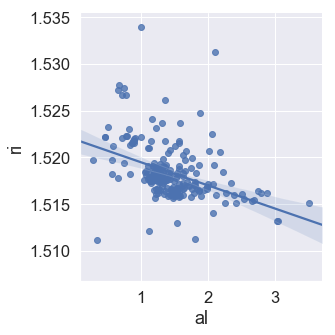

In [10]:
#scatter with regression line
sns.lmplot(x='al', y='ri', data=glass);

**How can we draw this plot (just the points — don't worry about the regression line) without using Seaborn?**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


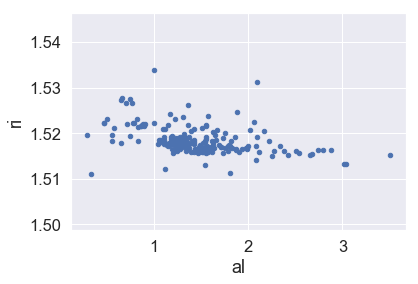

In [11]:
# Scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

# Seaborn with parameters
#sns.lmplot(x='al', y='ri', data=glass, fit_reg=False);

# Equivalent scatter plot using Matplotlib
#plt.scatter(glass.al, glass.ri)
#plt.xlabel('al')
#plt.ylabel('ri')

To build a linear regression model to predict `ri` using scikit-learn, we will need to Import `LinearRegression` from `linear_model`.

**Using `LinearRegression`, fit a model predicting `ri` from `al` (and an intercept).**

In [12]:
# Fit a linear regression model (name the model "linreg").
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri

linreg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X.head()

,al
0,1.10
1,1.36
2,1.54
3,1.29
4,1.24


In [14]:
y.head()

0    1.52101
1    1.51761
2    1.51618
3    1.51766
4    1.51742
Name: ri, dtype: float64

**Using the `LinearRegression` object we have fit, create a variable that are our predictions for `ri` for each row's `al` in the data set.**

In [15]:
# Make predictions for all values of X and add back to the original DataFrame.
y_pred = linreg.predict(X)

# new column of y_pred
glass['y_pred'] = y_pred

In [16]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873


**Plot the predicted `ri` against each `al` as a line.**

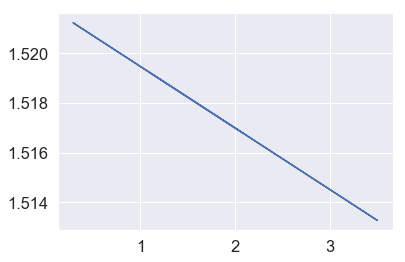

In [18]:
# Plot those predictions connected by a line (try plt.plot()).
plt.plot(glass.al, glass.y_pred)


_Note the y axis labels when comparing to seaborns plot_

**Plot this regression line with the scatter points on the same chart.**

Text(0, 0.5, 'ri')

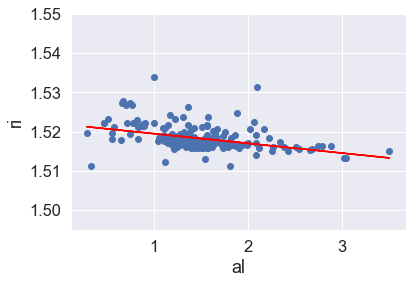

In [19]:
# Put the plots together (use a scatter and line graph).
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.y_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

<a id="refresher-interpreting-linear-regression-coefficients"></a>
## Refresher: Interpreting Linear Regression Coefficients
---

Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `al` predictor.

**Print out the intercept and coefficient values from our fit `LinearRegression` object.**

In [113]:
print(linreg.intercept_)
print(linreg.coef_)

1.5219453302386425
[-0.00247761]


**Manually compute the predicted value of `ri` when `al=2.0` using the regression equation.**

In [114]:
# Compute prediction for al=2 using the equation.
linreg.intercept_ + linreg.coef_[0] * 2

1.5169901174637033

**Confirm that this is the same value we would get when using the built-in `.predict()` method of the `LinearRegression` object.**

In [115]:
# Compute prediction for al=2 using the predict method.
OO=linreg.predict([[2]])

In [116]:
OO[0]

1.5169901174637033

What do these coefficents mean? 

**Coefficient interpretation:** A 1-unit increase in `al` is associated with a ~0.0025-unit decrease in `ri`.

**Intercept interpretation:** When `al = 0`, the estimated value of `ri` is 1.52194533024.

---

<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

**Examine the glass type column in the data set. What are the counts in each category?**

In [20]:
# Examine glass_type.
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [21]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


In [119]:
glass.household.unique()

array([0, 1])

In [22]:
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [23]:
glass['household_text'] = glass.glass_type.map({1:'window', 2:'window', 3:'window', 5:'household', 6:'household', 7:'household'})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_text
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,window
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,window
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,window
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,window
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,window


Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

**Make a scatter plot comparing `al` and `household`.**

Text(0, 0.5, 'household')

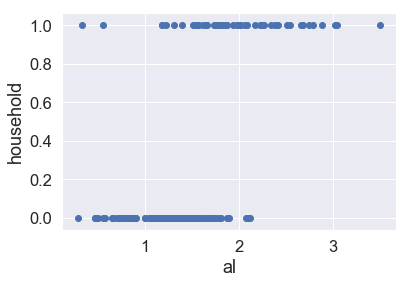

In [24]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

**Fit a new `LinearRegression` predicting `household` from `al`.**

Let's draw a regression line like we did before:

In [25]:
# Fit a linear regression model and store the predictions.
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household 
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X) # prediction via Lin Reg

Text(0, 0.5, 'household')

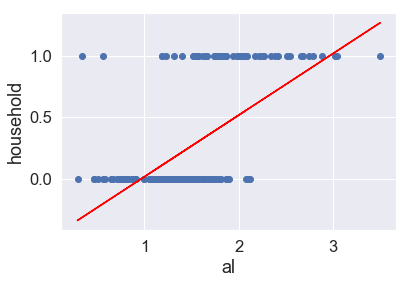

In [26]:
# Scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

**Using this threshold, create a new column of our predictions for whether a row is household glass.**

In [27]:
# Understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False.
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [28]:
# Transform household_pred to 1 or 0.
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_text,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,window,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,window,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,window,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,window,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,window,0.135623,0


**Plot a line that shows our predictions for class membership in household vs. not.**

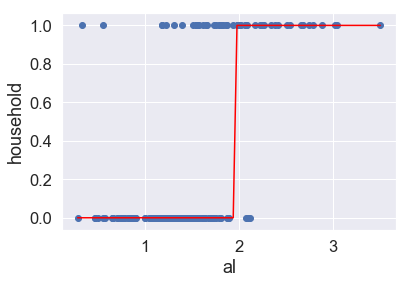

In [29]:
# sort so we can have a continuous line
glass.sort_values('al', inplace=True)
# Plot the class predictions.
plt.scatter(glass.al, glass.household)

plt.xlabel('al')
plt.ylabel('household')

plt.plot(glass.al, glass.household_pred_class, color='red')

<a id="using-logistic-regression-for-classification"></a>
## Using Logistic Regression for Classification
---

Logistic regression is a more appropriate method for what we just did with a linear regression. The values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. Logistic regression, on the other hand, ensures that the values output as predictions can be interpreted as probabilities of class membership.

**Import the `LogisticRegression` class from `linear_model` below and fit the same regression model predicting `household` from `al`.**

In [30]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)


**Plot the predicted class using the logistic regression as we did for the linear regression predictions above.**

As you can see, the class predictions are the same.

Text(0, 0.5, 'household')

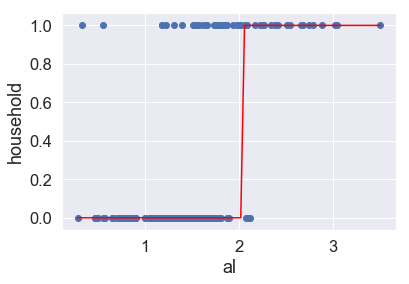

In [31]:
# Plot the class predictions.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [33]:
X.head()

,al
21,0.29
184,0.34
39,0.47
38,0.47
50,0.51


In [34]:
logreg.predict_proba(X)[0:5]

array([[0.97193375, 0.02806625],
       [0.96905681, 0.03094319],
       [0.96017962, 0.03982038],
       [0.96017962, 0.03982038],
       [0.9569876 , 0.0430124 ]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [35]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [36]:
glass.tail(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_text,household_pred,household_pred_class,household_pred_prob
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,7,1.515727,1,household,0.772118,1,0.714977
196,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7,1.515652,1,household,0.787153,1,0.727110
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00,7,1.515355,1,household,0.847295,1,0.772297
195,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7,1.515305,1,household,0.857318,1,0.779293
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7,1.515157,1,household,0.887389,1,0.799345
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1.515033,1,household,0.912448,1,0.814989
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1.514810,1,household,0.957554,1,0.840740
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.514463,1,household,1.027718,1,0.874932
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.514413,1,household,1.037742,1,0.879267
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,1.513274,1,household,1.268283,1,0.948366


**Plot the predicted probabilities as a line on our plot (probability of `household=1` as `al` changes).**

Text(0, 0.5, 'household')

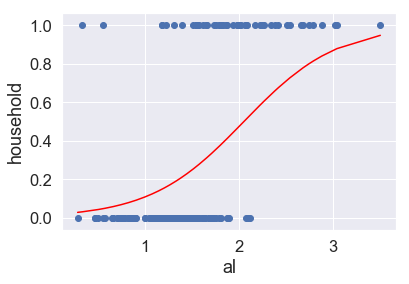

In [37]:
# Plot the predicted probabilities.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [38]:
# Examine some example predictions.
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.89253652 0.10746348]]
[[0.52645662 0.47354338]]
[[0.12953623 0.87046377]]


In [39]:
print(logreg.predict_proba([[2.5]]))

[[0.28913886 0.71086114]]


### Hands on Excercise
<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

- Select 2 different features
- y will remain the same `glass.household`
- Evaluate the model with `model.score` on the testing data.

In [48]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = glass[['na','fe']]
y = glass.household

# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=99)

# logistic regression model fit
LR.fit(X_train,y_train)

# do prediction on test Data
y_pred=LR.predict(X_test)
print(y_pred)

# Calculate score
LR.score(X_test,y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


0.813953488372093

<a id="probability-odds-e-log-and-log-odds"></a>
## Probability, e, Log, and Log Odds
---

To understand how logistic regression predicts the probability of class membership we need to start by understanding the relationship between probability, odds ratios, and log odds ratios. This is because logistic regression predicts log odds and so reading log odds is extremely useful for interpreting logistic regression.

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

It is often useful to think of the numeric odds as a ratio. For example, 5/1 = 5 odds is "5 to 1" -- five wins for every one loss (e.g. of six total plays). 2/3 odds means "2 to 3" -- two wins for every three losses (e.g. of five total plays).

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

----

<a id="understanding-e-and-the-natural-logarithm"></a>
### Understanding e and the Natural Logarithm

What is e? It is the base rate of growth shared by all continually growing processes:

e is the irrational base of the natural log `ln`.

- 2.718281828459

In [136]:
# Exponential function: e^1
e = np.exp(1)
e

2.718281828459045

What is a (natural) log? It gives you the time needed to reach a certain level of growth:

In [137]:
# Time needed to grow 1 unit to 2.718 units
# ln e = 1
np.log(2.718281828459) # very close to previous value

0.9999999999999832

In [138]:
np.log(e)

1.0

It is also the inverse of the exponential function:

In [139]:
# e^5
np.exp(5)

148.4131591025766

In [140]:
# np.exp(5)
2.7182818**5

148.41315133352072

In [141]:
# Taking the log of the exponential returns back to original input
np.log(np.exp(5))

5.0

Lets take one of our odds from out table and walk through how it works.

In [142]:
# Odds = 0.25
# ln 0.25 = -1.38629436
np.log(0.25)

-1.3862943611198906

In [143]:
print(e**-1.3862943611198906)
print(np.exp(-1.3862943611198906))

0.25000000000000006
0.25


<img src="./images/log_vs_ols.jpg" width="700" height="700" align="Center"/>

<a id="what-is-logistic-regression"></a>
## What Is Logistic Regression?
---

Linear regression: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the logit function.

Probability is sometimes written as pi.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson.

<a id="interpreting-logistic-regression-coefficients"></a>
## Interpreting Logistic Regression Coefficients

---

Logistic regression coefficients are not as immediately interpretable as the coefficients from a linear regression. To interpret the coefficients we need to remember how the formulation for logistic regression differs from linear regression.

**First let's plot our logistic regression predicted probability line again.**

Text(0, 0.5, 'household')

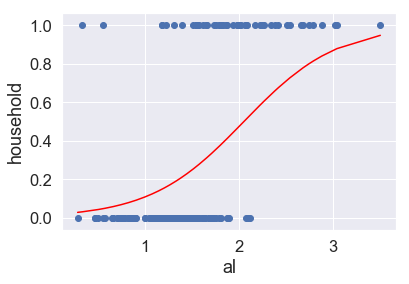

In [144]:
# Plot the predicted probabilities again.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

Remember:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

That means we'll get out the log odds if we compute the intercept plus the coefficient times a value for `al`.

**Compute the log odds of `household` when `al=2`.**

In [145]:
# Compute predicted log odds for al=2 using the equation.
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([-0.10592543])

Now that we have the log odds, we will need to go through the process of converting these log odds to probability.

**Convert the log odds to odds, then the odds to probability.**

In [146]:
# Convert log odds to odds.
odds = np.exp(logodds)
odds

array([0.89949172])

In [147]:
# Convert odds to probability.
prob = odds/(1 + odds)
prob

array([0.47354338])

This finally gives us the predicted probability of `household=1` when `al=2`. You can confirm this is the same as the value you would get out of the `.predict_proba()` method of the sklearn object.

In [148]:
# Compute predicted probability for al=2 using the predict_proba method.
logreg.predict_proba([[2]])[:, 1]

array([0.47354338])

In [149]:
# Examine the coefficient for al.
logreg.coef_[0]

array([2.01099096])

In [150]:
# Print the intercept.
logreg.intercept_

array([-4.12790736])

**Interpretation:** A 1-unit increase in `al` is associated with a 2.01-unit increase in the log odds of `household`.

In [151]:
# Increasing al by 1 (so that al=3)
logodds = -4.12790736 + 2.0109909641729442*3
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.8704637704833843

In [152]:
# Compute predicted probability for al=3 using the predict_proba method.
logreg.predict_proba([[3]])[:, 1]

array([0.87046377])

**Bottom line:** Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (and thus decrease the probability).

In [153]:
# Examine the intercept.
logreg.intercept_

array([-4.12790736])

**Intercept interpretation:** For an `al` value of 0, the log-odds of `household` is -4.12790736.

In [154]:
# Convert log odds to probability.
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.01586095])

That makes sense from the plot above, because the probability of `household=1` should be very low for such a low `al` value.

![Logistic regression beta values](./images/logistic_betas.png)

Changing the $\beta_0$ value shifts the curve horizontally, whereas changing the $\beta_1$ value changes the slope of the curve.

<a id="comparing-logistic-regression-to-other-models"></a>
## Comparing Logistic Regression to Other Models
---

Advantages of logistic regression:

- Highly interpretable (if you remember how).
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Outputs well-calibrated predicted probabilities.

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log odds of the response.
- Performance is (generally) not competitive with the best supervised learning methods.
- Can't automatically learn feature interactions.

# Lets build a Tree to classify

<img src="./images/tree.jpg" width="700" height="700" align="center"/>

In [68]:
glass.head(2)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_text,household_pred,household_pred_class,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.0,1,1.521227,0,window,-0.340495,0,0.028066
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.0,6,1.521103,1,household,-0.315436,0,0.030943


In [74]:
X = glass[['na','fe','al','k']]
y = glass.household
X.head()

,na,fe,al,k
21,14.77,0.00,0.29,0.03
184,17.38,0.00,0.34,0.00
39,14.21,0.00,0.47,0.11
38,14.21,0.00,0.47,0.11
50,13.72,0.16,0.51,0.09


In [75]:
y.head()

21     0
184    1
39     0
38     0
50     0
Name: household, dtype: int64

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image 
# Create decision tree classifer object
tree_model = DecisionTreeClassifier(random_state=0,max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# logistic regression model fit
tree_model.fit(X_train,y_train)

# do prediction on test Data
y_pred=tree_model.predict(X_test)
print(y_pred)

# Calculate score
tree_model.score(X_test,y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0]


0.8837209302325582

In [83]:
X.columns.values

array(['na', 'fe', 'al', 'k'], dtype=object)

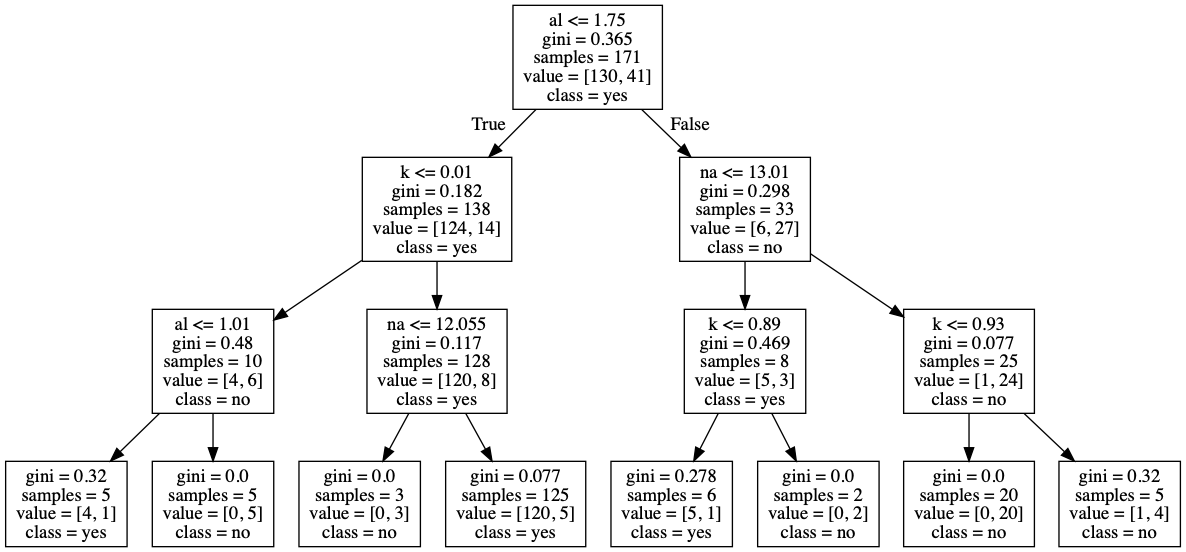

In [84]:
# Create DOT data
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=X.columns.values,  
                                class_names=['yes','no'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

----

## Is accuracy is good metric? 
<img src="./images/accuracy.png" width="700" height="700" align="center"/>

### The Accuracy Paradox

Accuracy is a very intuitive metric — it's a lot like an exam score where you get total correct/total attempted. However, accuracy is often a poor metric in application. There are many reasons for this:
- Imbalanced problems problems with 95% positives in the baseline will have 95% accuracy even with no predictive power.
  - This is the paradox; pursuing accuracy often means predicting the most common class rather than doing the most useful work.
- Applications often have uneven penalties and rewards for true positives and false positives.
- Ranking predictions in the correct order be more important than getting them correct.
- In many case we need to know the exact probability of a positives and negatives.
  - To calculate an expected return.
  - To triage observations that are borderline positive.

<a id="advanced-classification-metrics"></a>
## Advanced Classification Metrics

---

When we evaluate the performance of a logistic regression (or any classifier model), the standard metric to use is accuracy: How many class labels did we guess correctly? However, accuracy is only one of several metrics we could use when evaluating a classification model.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

Accuracy alone doesn’t always give us a full picture.

If we know a model is 75% accurate, it doesn’t provide any insight into why the 25% was wrong.

Consider a binary classification problem where we have 165 observations/rows of people who are either smokers or nonsmokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

There are 60 in class 0, nonsmokers, and 105 observations in class 1, smokers
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

We have 55 predictions of class, predicted as nonsmokers, and 110 of class 1, predicted to be smokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

- **True positives (TP):** These are cases in which we predicted yes (smokers), and they actually are smokers.
- **True negatives (TN):** We predicted no, and they are nonsmokers.
- **False positives (FP):** We predicted yes, but they were not actually smokers. (This is also known as a "Type I error.")
- **False negatives (FN):** We predicted no, but they are smokers. (This is also known as a "Type II error.")
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Categorize these as TP, TN, FP, or FN:**

Try not to look at the answers above.
    
- We predict nonsmoker, but the person is a smoker.
- We predict nonsmoker, and the person is a nonsmoker.
- We predict smoker and the person is a smoker.
- We predict smoker and the person is a nonsmoker.

<!--ANSWER
- FN
- TN
- TP
- FP
-->

<a id="accuracy-true-positive-rate-and-false-negative-rate"></a>
### Accuracy, True Positive Rate, and False Negative Rate

**Accuracy:** Overall, how often is the classifier correct?

<span>
    (<span style="color: green">TP</span>+<span style="color: red">TN</span>)/<span style="color: blue">total</span> = (<span style="color: green">100</span>+<span style="color: red">50</span>)/<span style="color: blue">165</span> = 0.91
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom; color: blue">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center; background-color: red">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center; background-color: green">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**True positive rate (TPR)** asks, “Out of all of the target class labels, how many were accurately predicted to belong to that class?”

For example, given a medical exam that tests for cancer, how often does it correctly identify patients with cancer?

<span>
<span style="color: green">TP</span>/<span style="color: blue">actual yes</span> = <span style="color: green">100</span>/<span style="color: blue">105</span> = 0.95
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center;background-color: green">TP = 100</td>
    <td style="text-align: center;color: blue">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**False positive rate (FPR)** asks, “Out of all items not belonging to a class label, how many were predicted as belonging to that target class label?”

For example, given a medical exam that tests for cancer, how often does it trigger a “false alarm” by incorrectly saying a patient has cancer?

<span>
<span style="color: orange">FP</span>/<span style="color: blue">actual no</span> = <span style="color: orange">10</span>/<span style="color: blue">60</span> = 0.17
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center;background-color: orange">FP = 10</td>
    <td style="text-align: center;color:blue">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Can you see that we might weigh TPR AND FPR differently depending on the situation?**

- Give an example when we care about TPR, but not FPR.
- Give an example when we care about FPR, but not TPR.

<!--
ANSWER:
- During an initial medical diagnosis, we want to be sensitive. We want initial screens to come up with a lot of true positives, even if we get a lot of false positives.
- If we are doing spam detection, we want to be precise. Anything that we remove from an inbox must be spam, which may mean accepting fewer true positives.
-->

## The Confusion Matrix
<img src="./images/confusion.png" width="500" height="500" align="center"/>

## Lets review the Matrix for above example

In [158]:
metrics.confusion_matrix(y_test, y_pred)

array([[37,  7],
       [ 6,  4]])

In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        44
           1       0.36      0.40      0.38        10

    accuracy                           0.76        54
   macro avg       0.61      0.62      0.62        54
weighted avg       0.77      0.76      0.76        54



---

## Lesson Review
- **Logistic regression**
  - What kind of machine learning problems does logistic regression address?
  - What do the coefficients in a logistic regression represent? How does the interpretation differ from ordinary least squares? How is it similar?
  
- **The confusion matrix**
  - How do true positive rate and false positive rate help explain accuracy?
  - Why might one classification metric be more important to tune than another? Give an example of a business problem or project where this would be the case.

# Now you do it 
<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

**Below we will load in some data on admissions to college.**

In [86]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics

admissions = pd.read_csv('data/admissions.csv')
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [87]:
admissions.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [88]:
admissions.dropna(inplace=True)
admissions.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64